In [1]:
# 1.0 Reset memory
#%reset -f
# 1.1 Call libraries

## A. Data manipulation
import numpy as np
import pandas as pd

# 1.2 for data splitting
from sklearn.model_selection import train_test_split

## B. Transformers for predictors:

# 1.3 Class for imputing missing values
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

# 1.4 One hot encode categorical data--Convert to dummy
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder 

# 1.5 Scale numeric data
from sklearn.preprocessing import StandardScaler

## C. Transformer for target:

# 1.6 Label encode target column
from sklearn.preprocessing import LabelEncoder

## D. Composite Transformers:

# 1.7 Class for applying multiple data transformation
#     jobs parallely
from sklearn.compose import ColumnTransformer

# 1.8 Pipeline class: Class for applying multiple
#     data transformations sequentially
from sklearn.pipeline import Pipeline

## E. Estimator

# 1.9 Estimator
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# User guide: https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier 

# 1.10 To plot graphs and pipeline diagram
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import set_config

In [2]:
# 2.0 Import warnings module
#     No FutureWarnings display
 
import warnings
# 2.1 Do not print warnings on screen
warnings.filterwarnings("ignore")

In [3]:
abc=pd.read_csv("E:\\Mid_term\\train.csv")
#reading file

In [4]:
df=abc.sample(50)

In [5]:
df.head()
#checking column

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
79641,249235,A,A,A,A,A,A,A,B,A,...,0.527375,0.443029,0.93875,0.51050,0.43373,0.396226,0.387819,0.633362,0.290763,4798.45
32384,101505,A,A,A,A,A,B,A,A,A,...,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.838162,360.73
51761,162217,A,A,A,A,B,A,A,A,A,...,0.710207,0.997553,0.48266,0.74247,0.56081,0.934141,0.927650,0.342239,0.729251,3159.06
121040,378064,A,B,A,A,A,A,A,A,B,...,0.643236,0.367661,0.44106,0.90264,0.78396,0.588753,0.665644,0.786955,0.390291,1342.96
52948,165895,B,B,A,A,A,A,A,A,B,...,0.290374,0.373185,0.26847,0.39447,0.37493,0.275431,0.270746,0.310026,0.771637,622.60


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 79641 to 166192
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 52.0+ KB


# Feature engineering

In [7]:
#As the target of our data was not having significant weightage all were shown on extremely low scale we tried to rescale it by using loss function

In [8]:
#Creating a loss column
df['logarithm_base10'] = np.log10(df['loss'])

In [9]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,logarithm_base10
79641,249235,A,A,A,A,A,A,A,B,A,...,0.443029,0.93875,0.51050,0.43373,0.396226,0.387819,0.633362,0.290763,4798.45,3.681101
32384,101505,A,A,A,A,A,B,A,A,A,...,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.838162,360.73,2.557182
51761,162217,A,A,A,A,B,A,A,A,A,...,0.997553,0.48266,0.74247,0.56081,0.934141,0.927650,0.342239,0.729251,3159.06,3.499558
121040,378064,A,B,A,A,A,A,A,A,B,...,0.367661,0.44106,0.90264,0.78396,0.588753,0.665644,0.786955,0.390291,1342.96,3.128063
52948,165895,B,B,A,A,A,A,A,A,B,...,0.373185,0.26847,0.39447,0.37493,0.275431,0.270746,0.310026,0.771637,622.60,2.794209


In [10]:
#creating bins
df["classification_of_logarithm_base10"] = pd.cut(
                               df['logarithm_base10'],
                               bins = 5,
                               labels= ["extremely low", "low","medium","high" , "extremely high"]
                               )

In [11]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,logarithm_base10,classification_of_logarithm_base10
79641,249235,A,A,A,A,A,A,A,B,A,...,0.93875,0.51050,0.43373,0.396226,0.387819,0.633362,0.290763,4798.45,3.681101,high
32384,101505,A,A,A,A,A,B,A,A,A,...,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.838162,360.73,2.557182,extremely low
51761,162217,A,A,A,A,B,A,A,A,A,...,0.48266,0.74247,0.56081,0.934141,0.927650,0.342239,0.729251,3159.06,3.499558,high
121040,378064,A,B,A,A,A,A,A,A,B,...,0.44106,0.90264,0.78396,0.588753,0.665644,0.786955,0.390291,1342.96,3.128063,low
52948,165895,B,B,A,A,A,A,A,A,B,...,0.26847,0.39447,0.37493,0.275431,0.270746,0.310026,0.771637,622.60,2.794209,extremely low


In [12]:
#removing the uncessary colums
df.drop(['loss','logarithm_base10'], axis=1,inplace= True)

<AxesSubplot:xlabel='classification_of_logarithm_base10', ylabel='count'>

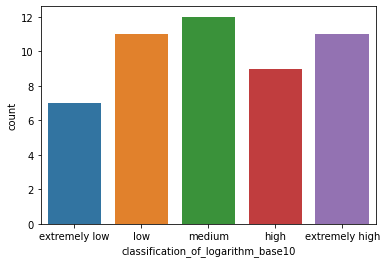

In [13]:
#datavisualization
sns.countplot(x="classification_of_logarithm_base10", data=df)

# Pipelining

In [14]:

# Which columns are numeric and which not
num_cols = ['id','cont1','cont2','cont3','cont4','cont5','cont6','cont7','cont8','cont9','cont10','cont11','cont12','cont13','cont14']
cat_cols = ['cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat10','cat11','cat12','cat13','cat14','cat15','cat16','cat17','cat18','cat19','cat20','cat21','cat22','cat23','cat24','cat25','cat26','cat27','cat28','cat29','cat30','cat31','cat32','cat33','cat34','cat35','cat36','cat37','cat38','cat39','cat40','cat41','cat42','cat43','cat44','cat45','cat46','cat47','cat48','cat49','cat50','cat51','cat52','cat53','cat54','cat55','cat56','cat57','cat58','cat59','cat60','cat61','cat62','cat63','cat64','cat65','cat66','cat67','cat68','cat69','cat70','cat71','cat72','cat73','cat74','cat75','cat76','cat77','cat78','cat79','cat80','cat81','cat82','cat83','cat84','cat85','cat86','cat87','cat88','cat89','cat90','cat91','cat92','cat93','cat94','cat95','cat96','cat97','cat98','cat99','cat100','cat101','cat102','cat103','cat104','cat105','cat106','cat107','cat108','cat109','cat110','cat111','cat112','cat113','cat114','cat115','cat116']



In [15]:
num_cols

['id',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

In [16]:
cat_cols

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

In [17]:
# Create pipe for both numerical as also categorical data
nc_pipe = Pipeline([ ('impute', SimpleImputer(strategy = 'median')), ('ss', StandardScaler()) ])
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), ('ohe', OneHotEncoder())])

In [18]:
# Test each pipe
nc_pipe.fit_transform(df[num_cols])
cat_pipe.fit_transform(df[cat_cols])

<50x391 sparse matrix of type '<class 'numpy.float64'>'
	with 5800 stored elements in Compressed Sparse Row format>

In [19]:
#fitting cat
ct = ColumnTransformer([ ('nc', nc_pipe, num_cols), ('cp', cat_pipe,cat_cols)])

In [20]:
ct.fit_transform(df)

array([[-0.3430054 , -0.1250373 ,  0.5117906 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.20184732, -0.91814453, -0.78339331, ...,  0.        ,
         0.        ,  0.        ],
       [-0.84889253,  1.07255418,  0.5117906 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.71207139, -0.82909044, -0.16226715, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64497964, -0.0864048 , -0.48458972, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.22099031, -1.12700265,  0.17375002, ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
pt = Pipeline([ ('ct', ct), ('dt', DecisionTreeClassifier())])


In [22]:
# Your train data
#loss is removed
y_train = df.pop('classification_of_logarithm_base10')
X_train = df

In [23]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
79641,249235,A,A,A,A,A,A,A,B,A,...,0.388783,0.527375,0.443029,0.93875,0.51050,0.43373,0.396226,0.387819,0.633362,0.290763
32384,101505,A,A,A,A,A,B,A,A,A,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.838162
51761,162217,A,A,A,A,B,A,A,A,A,...,0.560299,0.710207,0.997553,0.48266,0.74247,0.56081,0.934141,0.927650,0.342239,0.729251
121040,378064,A,B,A,A,A,A,A,A,B,...,0.465115,0.643236,0.367661,0.44106,0.90264,0.78396,0.588753,0.665644,0.786955,0.390291
52948,165895,B,B,A,A,A,A,A,A,B,...,0.422268,0.290374,0.373185,0.26847,0.39447,0.37493,0.275431,0.270746,0.310026,0.771637


In [24]:
# Fit final pipe on the data
pt.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['id', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13',
                                                   'cont14']),
                                                 ('cp',
                                                  Pipeline(steps=[('impute',
   

In [25]:
# Make predictions
pt.predict(X_train)

array(['high', 'extremely low', 'high', 'low', 'extremely low', 'low',
       'low', 'medium', 'medium', 'low', 'medium', 'extremely high',
       'high', 'extremely low', 'low', 'low', 'extremely high', 'medium',
       'extremely low', 'extremely high', 'extremely low',
       'extremely high', 'high', 'low', 'extremely high',
       'extremely high', 'low', 'extremely low', 'high', 'extremely high',
       'extremely high', 'medium', 'high', 'extremely high', 'low',
       'medium', 'medium', 'medium', 'medium', 'high', 'high', 'medium',
       'medium', 'low', 'medium', 'extremely high', 'low',
       'extremely low', 'extremely high', 'high'], dtype=object)

In [26]:
set_config(display='diagram')
pt

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['id', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13',
                                                   'cont14']),
                                                 ('cp',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['cat1', 'cat2', 'cat3',
                                                   'cat4', 'cat5', 'cat6',
                                                   'cat7', 'cat8', 'cat9',
                                                   'cat10', 'cat11', 'cat12',
                                                   'cat13', 'cat14', 'cat15',
                                                   'cat16', 'cat17', 'cat18',
                                                   'cat19', 'cat20', 'cat21',
                                                   'cat22', 'cat23', 'cat24',
                                                   'cat25', 'cat26', 'cat27',
                                                   'cat28', 'cat29', 'cat30', ...])])),
                ('dt', DecisionTreeClassifier())])

# Cross Validation

In [27]:
X_train.head(10)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
79641,249235,A,A,A,A,A,A,A,B,A,...,0.388783,0.527375,0.443029,0.93875,0.51050,0.43373,0.396226,0.387819,0.633362,0.290763
32384,101505,A,A,A,A,A,B,A,A,A,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.838162
51761,162217,A,A,A,A,B,A,A,A,A,...,0.560299,0.710207,0.997553,0.48266,0.74247,0.56081,0.934141,0.927650,0.342239,0.729251
121040,378064,A,B,A,A,A,A,A,A,B,...,0.465115,0.643236,0.367661,0.44106,0.90264,0.78396,0.588753,0.665644,0.786955,0.390291
52948,165895,B,B,A,A,A,A,A,A,B,...,0.422268,0.290374,0.373185,0.26847,0.39447,0.37493,0.275431,0.270746,0.310026,0.771637
134800,420549,A,A,A,A,B,A,A,A,A,...,0.281143,0.392395,0.305529,0.26847,0.28578,0.58257,0.453334,0.443374,0.175568,0.216558
167982,523914,A,A,A,A,B,A,A,A,A,...,0.281143,0.776142,0.528869,0.75964,0.86398,0.78770,0.784967,0.772574,0.751507,0.407114
149861,467300,A,A,A,A,B,A,A,A,A,...,0.281143,0.505057,0.542126,0.72775,0.40455,0.47779,0.418822,0.409777,0.310026,0.744409
166896,520452,A,A,A,A,B,A,A,A,A,...,0.491114,0.222105,0.204074,0.48864,0.33987,0.23948,0.180456,0.178698,0.210818,0.197442
169394,528374,A,A,A,A,A,B,A,A,A,...,0.525831,0.787967,0.772517,0.53642,0.47900,0.48889,0.577376,0.564899,0.763747,0.388671


In [28]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [29]:
X=df

In [30]:
lab = ['cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat10','cat11','cat12','cat13','cat14','cat15','cat16','cat17','cat18','cat19','cat20','cat21','cat22','cat23','cat24','cat25','cat26','cat27','cat28','cat29','cat30','cat31','cat32','cat33','cat34','cat35','cat36','cat37','cat38','cat39','cat40','cat41','cat42','cat43','cat44','cat45','cat46','cat47','cat48','cat49','cat50','cat51','cat52','cat53','cat54','cat55','cat56','cat57','cat58','cat59','cat60','cat61','cat62','cat63','cat64','cat65','cat66','cat67','cat68','cat69','cat70','cat71','cat72','cat73','cat74','cat75','cat76','cat77','cat78','cat79','cat80','cat81','cat82','cat83','cat84','cat85','cat86','cat87','cat88','cat89','cat90','cat91','cat92','cat93','cat94','cat95','cat96','cat97','cat98','cat99','cat100','cat101','cat102','cat103','cat104','cat105','cat106','cat107','cat108','cat109','cat110','cat111','cat112','cat113','cat114','cat115','cat116']


In [31]:
X[lab]=X[lab].apply(label_encoder.fit_transform)

In [32]:
X.shape

(50, 131)

In [33]:
from sklearn.model_selection import cross_val_score


In [34]:
from skopt import BayesSearchCV

In [35]:
from skopt.space import Real, Categorical, Integer

In [36]:
from sklearn.model_selection import StratifiedKFold
cvStrategy = StratifiedKFold(
                             n_splits=3,
                             shuffle=True,
                             random_state=42
                            )

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

The list of models that we will be using as follows:

In [38]:
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [39]:
df

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
79641,249235,0,0,0,0,0,0,0,1,0,...,0.388783,0.527375,0.443029,0.93875,0.51050,0.43373,0.396226,0.387819,0.633362,0.290763
32384,101505,0,0,0,0,0,1,0,0,0,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.838162
51761,162217,0,0,0,0,1,0,0,0,0,...,0.560299,0.710207,0.997553,0.48266,0.74247,0.56081,0.934141,0.927650,0.342239,0.729251
121040,378064,0,1,0,0,0,0,0,0,1,...,0.465115,0.643236,0.367661,0.44106,0.90264,0.78396,0.588753,0.665644,0.786955,0.390291
52948,165895,1,1,0,0,0,0,0,0,1,...,0.422268,0.290374,0.373185,0.26847,0.39447,0.37493,0.275431,0.270746,0.310026,0.771637
134800,420549,0,0,0,0,1,0,0,0,0,...,0.281143,0.392395,0.305529,0.26847,0.28578,0.58257,0.453334,0.443374,0.175568,0.216558
167982,523914,0,0,0,0,1,0,0,0,0,...,0.281143,0.776142,0.528869,0.75964,0.86398,0.78770,0.784967,0.772574,0.751507,0.407114
149861,467300,0,0,0,0,1,0,0,0,0,...,0.281143,0.505057,0.542126,0.72775,0.40455,0.47779,0.418822,0.409777,0.310026,0.744409
166896,520452,0,0,0,0,1,0,0,0,0,...,0.491114,0.222105,0.204074,0.48864,0.33987,0.23948,0.180456,0.178698,0.210818,0.197442
169394,528374,0,0,0,0,0,1,0,0,0,...,0.525831,0.787967,0.772517,0.53642,0.47900,0.48889,0.577376,0.564899,0.763747,0.388671


In [40]:
y=y_train

In [41]:
y.shape

(50,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    shuffle = True,
                                                    stratify = y
                                                    )

In [43]:
def compare_models_train_test():

  for model in models:

    # training the model
    model.fit(X_train, y_train)
    
    # evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)

In [44]:
from sklearn.metrics import accuracy_score
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000)  =  0.3
Accuracy score of the  SVC(kernel='linear')  =  0.2
Accuracy score of the  KNeighborsClassifier()  =  0.4
Accuracy score of the  RandomForestClassifier()  =  0.3


In [45]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.2 0.2 0.3 0.2 0.2]
22.0


In [46]:
#Likewise we have defined a function to get the average accuracy for all other models and we have taken cv as 5 for all the models.

In [47]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X,y, cv=5)
    
    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')


In [48]:
#Now comparing the accuracy of all the models without cross validation and with cross validation. Without cv RandomForestClassifier performed the best and even with cv RandomForestClassifier performed the best but the accuracy of the same decreased from 94.31% to 92.73%.

In [49]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000) =   [0.2 0.2 0.3 0.2 0.2]
Accuracy % of the  LogisticRegression(max_iter=1000) 22.0
----------------------------------------------
Cross Validation accuracies for  SVC(kernel='linear') =   [0.2 0.2 0.1 0.3 0.2]
Accuracy % of the  SVC(kernel='linear') 20.0
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier() =   [0.1 0.4 0.2 0.3 0.1]
Accuracy % of the  KNeighborsClassifier() 22.0
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [0.1 0.2 0.3 0.3 0.3]
Accuracy % of the  RandomForestClassifier() 24.0
----------------------------------------------


# Hyperparameter Tuning

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [51]:
#GridSearchCV is used for determining the best parameters for our model

#Loading SVC(Super Vector Classifier) model.

In [52]:
model = SVC()

In [53]:
#Hyperparameters

In [54]:
parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [55]:
#GridSearch

In [56]:
classifier = GridSearchCV(model, parameters, cv=5)

In [57]:
#Fitting data to our model.

In [58]:
classifier.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [59]:
classifier.cv_results_

{'mean_fit_time': array([2.18215938e+02, 2.23369598e-03, 5.79795837e-03, 6.93235397e-03,
        1.98171246e+02, 7.66291618e-03, 2.02302933e-03, 2.44526863e-03,
        1.89903198e+02, 8.00995827e-03, 1.18546009e-02, 1.21867180e-02,
        2.20683723e+02, 6.71238899e-03, 4.06584740e-03, 0.00000000e+00]),
 'std_fit_time': array([1.24841548e+02, 3.52669887e-03, 4.76711742e-03, 3.97637913e-03,
        1.36400309e+02, 3.91033689e-03, 3.29182746e-03, 2.95876713e-03,
        1.20492460e+02, 6.64251506e-03, 2.66046188e-03, 1.72290646e-03,
        1.43865917e+02, 3.59095003e-03, 4.97962591e-03, 0.00000000e+00]),
 'mean_score_time': array([0.00696702, 0.0034214 , 0.00398169, 0.00160646, 0.00401392,
        0.00245881, 0.00809193, 0.00041285, 0.00374269, 0.00803113,
        0.00827885, 0.00578046, 0.00362325, 0.00655627, 0.00832119,
        0.00970058]),
 'std_score_time': array([0.00191444, 0.00379286, 0.00431687, 0.00321293, 0.00339144,
        0.00396651, 0.00326226, 0.00082569, 0.0038202 , 

In [60]:
#Looking for the parameters that performed the best.

In [61]:
best_parameters = classifier.best_params_
print(best_parameters)

{'C': 5, 'kernel': 'poly'}


In [63]:
#Checking the highest accuracy that we got from the best parameters in GridSearchCV..

In [64]:
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.4


RandomizedSearchCV

Loading SVC(Super Vector Classifier) model.

In [65]:
model = SVC()

Hyperparameters

In [66]:
parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

RandomizedSearch

In [69]:
classifier = RandomizedSearchCV(model, parameters, cv=5)

Fitting the data to our model.

In [70]:
classifier.fit(X, y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [71]:
classifier.cv_results_

{'mean_fit_time': array([1.48536682e-02, 1.79393392e+02, 4.89106178e-03, 2.02673564e+02,
        2.34091931e+02, 1.39528751e-02, 1.42543316e-02, 1.40458107e-02,
        1.18261814e-02, 5.81836457e+02]),
 'std_fit_time': array([1.48518679e-02, 1.05377868e+02, 3.99658893e-03, 1.43943953e+02,
        1.52020633e+02, 1.65066064e-03, 4.09444679e-03, 2.67500464e-03,
        2.77986785e-03, 5.41178135e+02]),
 'mean_score_time': array([0.00795403, 0.0076396 , 0.00590382, 0.00476069, 0.00616093,
        0.01017404, 0.01659751, 0.00788279, 0.00797491, 0.00978475]),
 'std_score_time': array([0.00322027, 0.00390142, 0.00357114, 0.00461335, 0.00317444,
        0.00261613, 0.00741885, 0.00216191, 0.00247495, 0.00468133]),
 'param_kernel': masked_array(data=['poly', 'linear', 'sigmoid', 'linear', 'linear',
                    'sigmoid', 'rbf', 'sigmoid', 'sigmoid', 'linear'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_va

In [72]:
best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'poly', 'C': 10}


In [73]:
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.4
